<a href="https://colab.research.google.com/github/tarabelo/2025-Curso-UEX/blob/main/Algoritmo%20de%20b%C3%BAsqueda%20de%20Grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalamos qiskit en el notebook
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=d58341bda8989fd42179efa864e40d37efd16f380649631aa094ee596de1c492
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
import numpy as np
from math import sqrt

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
# import basic plot tools
from qiskit.visualization import plot_histogram

# Funciones auxiliares

# Función para simular y mostrar el vector de estado
def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    # Usamos el simulador de vector de estado
    # https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

# Funcion para obtener y mostrar la matriz unitaria
def obten_unitaria(qcirc, etiqueta):
    # Usamos el simulador de matriz unitaria
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

# Algoritmo de búsqueda de Grover: amplificación de amplitud <a name="grover"></a>


Primer algoritmo con una utilidad práctica real.
 - No presenta una ventaja exponencial, solo cuadrática

Puede usarse en diferentes aplicaciones:
 - Búsqueda en bases de datos no ordenadas
 - [Cálculo de Colisiones Hash](https://arxiv.org/abs/quant-ph/9705002)
 - Problemas de satisfacción de restricciones: [Grover Adaptive Search](https://qiskit-community.github.io/qiskit-optimization/tutorials/04_grover_optimizer.html)


### Contenidos

1. [Oráculo Grover](#oraculo)
1. [Inversión de fase](#inversion)
1. [Amplificación de amplitud](#amplitud)
1. [Interpretación geométrica del algoritmo de Grover](#geo)

# Oráculo Grover<a name="oraculo"></a>

Este algoritmo busca un dato en una lista no estructurada.

El oráculo $f:\{0,1\}^n \rightarrow \{0,1\}$ es tal que existe un único $x_i$ tal que:
$$
f(x) =
\begin{cases}
1, \text{si } x=x_i\\
0, \text{si } x\ne x_i
\end{cases}
$$

Buscamos $x_i$.

**Nota**: Es posible generalizar el algoritmo para cuando existe más de un dato $x_i$

**Solución clásica**

Si $N=2^n$ es el número de datos en la lista, un algoritmo clásico necesita efectuar, en el peor de los casos $N$ evaluaciones de $f(x)$, y de media $N/2$, por lo que la complejidad es $\mathcal{O}(2^n)$

**Solución cuántica**

El algoritmo cuántico ([L. K. Grover, 1996](http://doi.acm.org/10.1145/237814.237866)) solo necesita $\mathcal{O}\left(\sqrt{2^n}\right)$ evaluaciones.

El algoritmo tiene dos partes: **Inversión de fase** y **Amplificación de amplitud**.



# Inversión de fase<a name="inversion"></a>

Mediante el siguiente circuito invertimos la fase de $|x_i\rangle$:


<center><img src="https://drive.google.com/uc?export=view&id=1GQrOSYGXzA06IfD4LKAqwwe0V-B8NNFC" alt="Grover inversion de fase" width="700"  /></center>

Pasos:

<ol>
   <li>
        Estado inicial:
        

$$\vert \psi_0 \rangle =  \vert1\rangle\vert0\rangle^{\otimes n}$$


   </li>
    
   <li>
        Después de aplicar las primeras puertas H:
$$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} (|0\rangle-|1\rangle)\vert x\rangle $$
   </li>
   <p>
   <li>
        Aplicamos $U_f$ a $\vert y\rangle\vert x\rangle$ para obtener $\vert y \oplus f(x)\rangle\vert x\rangle$:
        $$
            \lvert \psi_2 \rangle  
                 = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(|0\oplus f(x)\rangle - |1\oplus f(x)\rangle)|x\rangle
        $$
          </li>
<p>
   <li>Como $f(x) = 1$ si $x = x_i$ y $f(x)=0$ en otro caso podemos escribir:
$$
\begin{aligned}
\lvert \psi_2 \rangle  
&= \frac{1}{\sqrt{2^{n+1}}}\left[\left(|0\oplus f(x_i)\rangle - |1\oplus f(x_i)\rangle\right)|x_i\rangle + \sum_{x\ne x_i}\left(|0\oplus f(x)\rangle - |1\oplus f(x)\rangle\right)|x\rangle\right] \\
&= \frac{1}{\sqrt{2^{n+1}}}\left[(|1\rangle - |0\rangle)|x_i\rangle + \sum_{x\ne x_i}\left(|0\rangle - |1\rangle\right)|x\rangle\right] \\
&= \frac{1}{\sqrt{2^{n+1}}}\left[\left(\sum_{x\ne x_i}\left(|0\rangle - |1\rangle\right)|x\rangle\right) - (|0\rangle - |1\rangle)|x_i\rangle\right] \\
&= \frac{|0\rangle - |1\rangle}{\sqrt{2}}\frac{\sum_{x\ne x_i}|x\rangle- |x_i\rangle}{\sqrt{2^{n}}}
\end{aligned}
$$  
          </li><br>
</ol>

El estado que medimos es, por lo tanto:

$$
\frac{\sum_{x\ne x_i}|x\rangle- |x_i\rangle}{\sqrt{2^{n}}}
$$

Vemos que el estado $|x_i\rangle$ aparece con signo negativo.



Implementar esta inversión de fase es simple ya que es una operación reversible.  

Con 2 cúbits queremos invertir el estado $s = |10\rangle$:

1. Partimos de un estado en superposición
$$
\frac{|00\rangle + |01\rangle + |10\rangle + |11\rangle}{2}
$$
2. Invertimos los cúbits para los cuales hay un 0 en $s$ y obtenemos:
$$
\frac{|01\rangle + |00\rangle + |11\rangle + |10\rangle}{2}
$$
3. Aplicamos una puerta CZ entre los cúbits, que cambia el signo al estado $|11\rangle$
$$
\frac{|01\rangle + |00\rangle - |11\rangle + |10\rangle}{2}
$$
4. Volvemos a invertir los cúbits para los cuales hay un 0 en $s$:
$$
\frac{|00\rangle + |01\rangle - |10\rangle + |11\rangle}{2}
$$

El problema es que, al medir, obtenemos con igual probabilidad cualquier valor de $|x\rangle$ ya que lo único que diferencia a $|x_i\rangle$ es la fase. Necesitamos convertir diferencias de fase en diferencias de amplitud, lo que se consigue amplificando la amplitud del estado marcado.

### Ejemplo 1

Circuito de 3 cúbits implementando la inversión de fase para un estado determinado, usando una puerta CCZ.


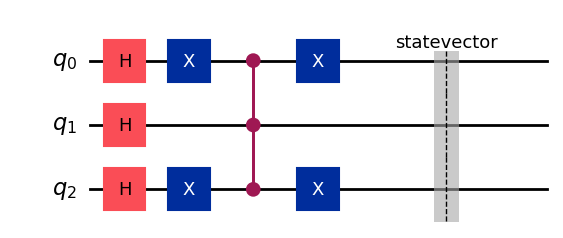

In [3]:
# Queremos invertir el estado |010>
n = 3 # número de cúbits
s = 2 # estado |010>

# Creamos el circuito
qc_pinv = QuantumCircuit(n)

# Ponemos los qbits en superposición
for q in range(n):
    qc_pinv.h(q)

# Invertimos los cubits para los que s tenga un bit a 0
temp = s
for b in range(n):
    if(temp&1 == 0):
        qc_pinv.x(b)
    temp >>= 1

qc_pinv.ccz(0,1,2)  # El cambio de fase afecta a |s>

# Volvemos a invertir los cubits para los que s tenga un bit a 0
temp = s
for b in range(n):
    if(temp&1 == 0):
        qc_pinv.x(b)
    temp >>= 1

qc_pinv.save_statevector()
qc_pinv.draw('mpl')

In [4]:
obten_estado(qc_pinv)

<IPython.core.display.Latex object>

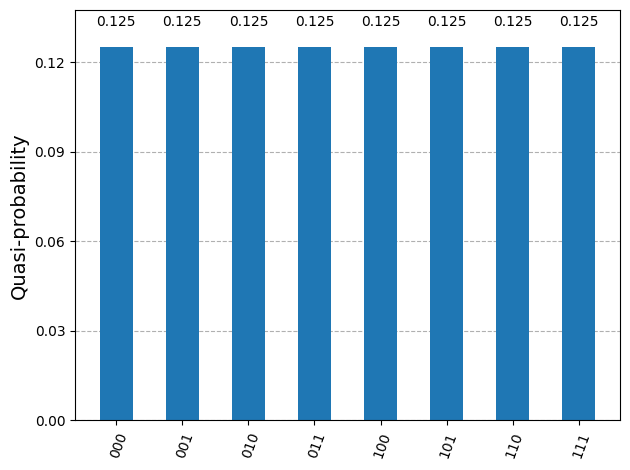

In [5]:
# Simulamos para ver la salida
sim = AerSimulator(method='automatic')
qc_obj = transpile(qc_pinv,sim)
result = sim.run(qc_obj).result()
salida = result.get_counts()
plot_histogram(salida)

### Ejemplo 2

Usando una puerta multi-controlled multi-target \([MCMT](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.MCMT)\) podemos generalizarlo a un numero arbitrario de cúbits.


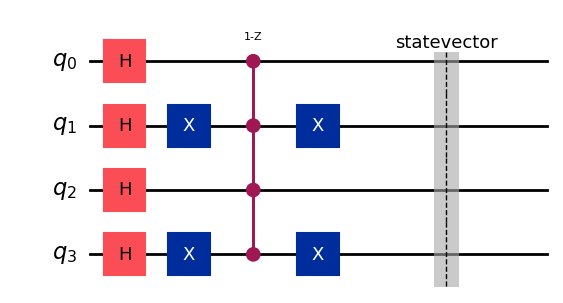

In [12]:
from qiskit.circuit.library import MCMTGate, ZGate


def inversor(n,s):
    # Creamos el circuito
    qc = QuantumCircuit(n)

    # Invertimos los cubits para los que s tenga un bit a 0
    temp = s
    for b in range(n):
        if(temp&1 == 0):
            qc.x(b)
        temp >>= 1

    qc = qc.compose(MCMTGate(ZGate(),n-1,1)) # Puerta Z con n-1 control y 1 target

    # Volvemos a invertir los cubits para los que s tenga un bit a 0
    temp = s
    for b in range(n):
        if(temp&1 == 0):
            qc.x(b)
        temp >>= 1
    return qc

n = 4 # Número de cúbits
s = 5 # Estado a invertir

qc_pinv = QuantumCircuit(n)

# Ponemos los qbits en superposición
for q in range(n):
    qc_pinv.h(q)

# Añadimos el inversor
qc_pinv = qc_pinv.compose(inversor(n,s))
qc_pinv.save_statevector()
qc_pinv.draw('mpl')

In [13]:
obten_estado(qc_pinv)

<IPython.core.display.Latex object>

### Ejemplo 3

Generalizamos el caso anterior para invertir varios estados.

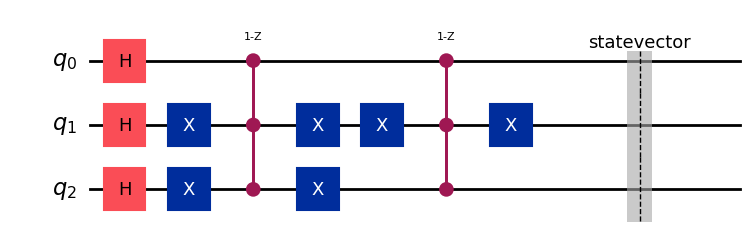

In [14]:
from qiskit.circuit.library import MCMTGate, ZGate

# Ahora s es una lista con los estados que queremos invertir
def inversor(n,slist):
    # Creamos el circuito
    qc = QuantumCircuit(n)

    # Invertimos los cubits para los que s tenga un bit a 0
    for s in slist:
        temp = s
        for b in range(n):
            if(temp&1 == 0):
                qc.x(b)
            temp >>= 1

        qc = qc.compose(MCMTGate(ZGate(),n-1,1)) # Puerta Z con n-1 control y 1 target

        # Volvemos a invertir los cubits para los que s tenga un bit a 0
        temp = s
        for b in range(n):
            if(temp&1 == 0):
                qc.x(b)
            temp >>= 1
    return qc

n = 3 # Número de cúbits
s = [1,5] # Estado a invertir

qc_pinv = QuantumCircuit(n)

# Ponemos los qbits en superposición
for q in range(n):
    qc_pinv.h(q)

# Añadimos el inversor
qc_pinv = qc_pinv.compose(inversor(n,s))
qc_pinv.save_statevector()
qc_pinv.draw('mpl')

In [15]:
obten_estado(qc_pinv)

<IPython.core.display.Latex object>

# Amplificación de amplitud<a name="amplitud"></a>

La AA se basa en aumentar la amplitud de los estados que tengan una fase negativa. La idea básica es la *inversión sobre la media*.

Supongamos el vector (decimal) $v=[10,10,10,-10,10]^T$. La media de esos valores es $\overline{v}=6$. Y la diferencia, en valor absoluto, entre $v[3]$ y el resto de valores es $0$.

Invertir sobre la media consiste en repetir esta operación:

$$
v^\prime = \overline{v} + (\overline{v}-v) = 2\overline{v} -v,\quad i = 0,1,2\ldots
$$

cambiando en cada iteración el signo del elemento negativo de $v$.

Aplicando esta operación al vector anterior obtenemos:

$$
v^\prime=2\times6 - v = [12,12,12,12,12]^T - [10,10,10,-10,10]^T = [2,2,2,22,2]^T
$$

La media sigue siendo la misma pero el tercer valor, antes negativo, se separa del resto. La diferencia ahora es $20$.

Podemos repetir el procedimiento, negando $v[3]$ para obtener $v=[2,2,2,-22,2]^T$ de media $\overline{v}=-2.8$. Volviendo a calcular $v^\prime$, obtenemos:

$$
v^\prime=2\times-2.8 - v = [-5.6,-5.6,-5.6,-5.6,-5.6]^T - [2,2,2,-22,2]^T = [-7.6,-7.6,-7.6,16.4,-7.6]^T
$$

La diferencia, en valor absoluto, entre $v[3]$ y el resto de valores se reduce a $8.8$.

En general, si $N$ es grande, a medida que aplicamos la inversión sobre la media esta diferencia se agranda, pero llega un punto en que empieza a disminuir.

<br>
<center><img src="https://drive.google.com/uc?export=view&id=1PfR30KDowUxz8Nfb-hLOV9Dpi9RR5BZc" alt="Evolucion de la inversion" width="700"  />
</center>


<center>Fuente: Combarro, González, "A practical guide to Quantum Machine Learning and Quantum Optimization", packt, 2023</center>
<br>

Se puede demostrar que para un vector de $N$ elementos (con $N$ grande), el número de inversiones que obtienen la máxima separación es $\mathcal{O}(\sqrt{N})$.

<br>



Podemos expresar este mecanismo usando matrices. Sea, de nuevo, $v=[10,10,10,-10,10]^T$ y la matriz:

$$
A=\frac{1}{5}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1
\end{bmatrix}
$$

Está claro que $Av = [6,6,6,6,6]^T = [\overline{v}, \overline{v}, \overline{v}, \overline{v}, \overline{v}]^T$. La operación de inversión la podemos expresar como una operación matricial:

$$v^\prime=2Av-v=(2A-I)v$$

Para un vector de $2^n$ elementos, la matriz $2A-1$ será de $2^n\times 2^n$:
$$
2A-I=\frac{2}{2^n}
  \begin{bmatrix}
    1 & 1 & \dots & 1 \\
    1 & 1 & \dots & 1 \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & 1 & \dots & 1
  \end{bmatrix}-
  \begin{bmatrix}
    1 & 0 & \dots & 0 \\
    0 & 1 & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & 1
  \end{bmatrix} =\frac{1}{2^{n-1}}
  \begin{bmatrix}
    1-2^{n-1} & 1 & \dots & 1 \\
    1 & 1-2^{n-1} & \dots & 1 \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & 1 & \dots & 1-2^{n-1}
  \end{bmatrix}
$$

Se puede demostrar que $U = 2A-I$ es una matriz unitaria, por lo que se puede contruir en un circuito cuántico.

<br>

Para el caso de 2 cúbits, la matriz $2A-I$ queda:
$$
2A-I=\frac{1}{2}
  \begin{bmatrix}
    -1 & 1 & 1 & 1 \\
    1 & -1 & 1 & 1 \\
    1 & 1 & -1 & 1 \\
    1 & 1 & 1 & -1
  \end{bmatrix}
$$

Esta matriz se llama operador de difusión o _difusor_ $R_s$.

<br>

Es fácil verificar que si $|s\rangle = |+\rangle^{\otimes n}$ es el estado de superposición completa, entonces $A = |s\rangle\langle s|$, por lo que:

$$
R_s = 2A-I = 2|s\rangle\langle s| -I
$$



### Implementación de $R_s$

Dado que $|s\rangle = |+\rangle^{\otimes n}= H^{\otimes n}|0\rangle^{\otimes n}$ se tiene :

$$
R_s = 2\left(H^{\otimes n}|0\rangle^{\otimes n}\langle 0|^{\otimes n}H^{\dagger\otimes n}\right)-I = 2\left(H^{\otimes n}|0\rangle^{\otimes n}\langle 0|^{\otimes n}H^{\otimes n}\right)-I
$$

ya que $H^\dagger = H$.

Además, podemos escribir $I = H^{\otimes n}H^{\otimes n}$. Por lo tanto:

$$
R_s = 2\left(H^{\otimes n}|0\rangle^{\otimes n}\langle 0|^{\otimes n}H^{\otimes n}\right)- H^{\otimes n}H^{\otimes n} = H^{\otimes n}\left(2|0\rangle^{\otimes n}\langle 0|^{\otimes n}-I\right)H^{\otimes n} = H^{\otimes n}R_0H^{\otimes n}
$$

siendo:

$$
R_0 = 2|0\rangle^{\otimes n}\langle 0|^{\otimes n}-I
$$

<br>

Es decir, podemos implementar $R_s$ como $R_0$ rodeado de puertas H:

<center><img src="https://drive.google.com/uc?export=view&id=1OrYgEeJuhO9RAVpvd1BoS2H-nayFKKhz" alt="Difusor Rs" width="300"  /></center>


### Implementación de $R_0$

Es posible comprobar que $R_0$ aplicado a cualquier estado cambia el signo de $|i\rangle$ para todo $i\ne 0$.

Ejemplo:

$$
R_0|++\rangle = \frac{1}{2}\left(2|00\rangle\langle 00|-I\right)\left(|00\rangle+|01\rangle+|10\rangle+|11\rangle\right) = \\
\frac{1}{2}\left(2|00\rangle\langle 00|00\rangle + 2|00\rangle\langle 00|01\rangle + 2|00\rangle\langle 00|10\rangle + 2|00\rangle\langle 00|11\rangle - |00\rangle-|01\rangle-|10\rangle-|11\rangle\right) = \frac{1}{2}\left(|00\rangle-|01\rangle-|10\rangle-|11\rangle\right)
$$

<br>

Para implementar esta operación, podemos empezar usando una puerta Z controlada:

<br>
<center><img src="https://drive.google.com/uc?export=view&id=1xpp0U6OmMiNaMaobqtMPIyINGyKGbtdg" alt="Difusor R0: Z controlada" width="150"  /></center>
<br>

Si se aplica al estado $|+\rangle^{\otimes n}$ cambia el signo del estado $|1\rangle^{\otimes n}$:

$$
\frac{1}{2}\left(|00\rangle+|01\rangle+|10\rangle-|11\rangle\right)
$$

<br>

Si añadimos puertas X a todos los cúbits, cambiamos el signo del estado $|0\rangle^{\otimes n}$

<br>
<center><img src="https://drive.google.com/uc?export=view&id=1k3s4JvVpfzR74-OsvteU6MrbK3P50AvZ" alt="Difusor R0: puertas X" width="200"  /></center>
<br>

$$
\frac{1}{2}\left(-|00\rangle+|01\rangle+|10\rangle+|11\rangle\right) = \frac{e^{i\pi}}{2}\left(|00\rangle-|01\rangle-|10\rangle-|11\rangle\right) \equiv \frac{1}{2}\left(|00\rangle-|01\rangle-|10\rangle-|11\rangle\right)
$$

<!---
Para obtener el resultado que buscamos, podemos usar que las puertas ZXZX aplicadas a un cúbit le cambián el signo:

$$
ZXZX|\phi\rangle = -|\phi\rangle
$$

Si se aplican estas puertas al cúbit más significativo, obtendremos el resultado:

<br>
<center><img src="https://drive.google.com/uc?export=view&id=1kER6ai8Qd0G5fijpk3cDvUAccDGLrrfH" alt="Difusor R0: puertas ZXZX" width="400"  /></center>
<br>


$$
\frac{1}{2}\left(|00\rangle-|01\rangle-|10\rangle-|11\rangle\right)
$$

Se pueden simplificar las dos X consecutivas, por lo que la implementación de $R_0$ queda:


<br>
<center><img src="https://drive.google.com/uc?export=view&id=1kowaV2C_ykZ1xyxqR7bVoHmrND2m0SFt" alt="Difusor R0: simplificado" width="400"  /></center>
<br>
--->

### Ejemplo 4

Programa en Qiskit una función que devuelva una puerta $R_s$ para un número arbitrario de cúbits.

Obtén la matriz unitaria asociada y comprueba que coincide con lo esperado.

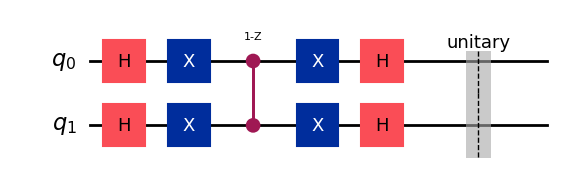

In [16]:
from qiskit.circuit.library import MCMTGate, ZGate

def difusor(nqubits):
    qc = QuantumCircuit(nqubits)
    # H-gates
    qc.h(range(nqubits))

    # X-gates
    qc.x(range(nqubits))

    # Implementa una puerta Z multicontrolada
    # Una forma de hacer una Z multicontrolada con H y Toffoli
    #qc.h(nqubits-1)
    #qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    #qc.h(nqubits-1)
    # Directamente con MCMT
    qc = qc.compose(MCMTGate(ZGate(),nqubits-1, 1))

    # X-gates
    qc.x(range(nqubits))


    # H-gates
    qc.h(range(nqubits))

    return qc

qc_dif = difusor(2)

qc_dif.save_unitary()

qc_dif.draw('mpl')

Juntando la inversión de fase con la amplificación de amplitud, el circuito que implementa el algoritmo de Grover queda:

<!--img src="https://github.com/tarabelo/PIAC-apuntes/blob/main/images/Grover2.svg?raw=1" alt="Grover completo" style="width: 800px;"/-->

<br>
<center><img src="https://drive.google.com/uc?export=view&id=1Jgx29CcPQelYV3WdFDMzHElXbmxeFHNH" alt="Difusor R0: simplificado" width="800"  /></center>
<br>


### Ejemplo 5

Implementación en Qiskit del algoritmo de Grover para para un número arbitrario de cúbits.

In [27]:
def grover(n,s):
    # Combina las dos partes de Grover
    qc = QuantumCircuit(n)
    # Inversor
    qc = qc.compose(inversor(n,s))
    qc.barrier()
    # Difusor
    qc = qc.compose(difusor(n))
    qc.barrier()

    return qc

Numero de iteraciones ideal = 4


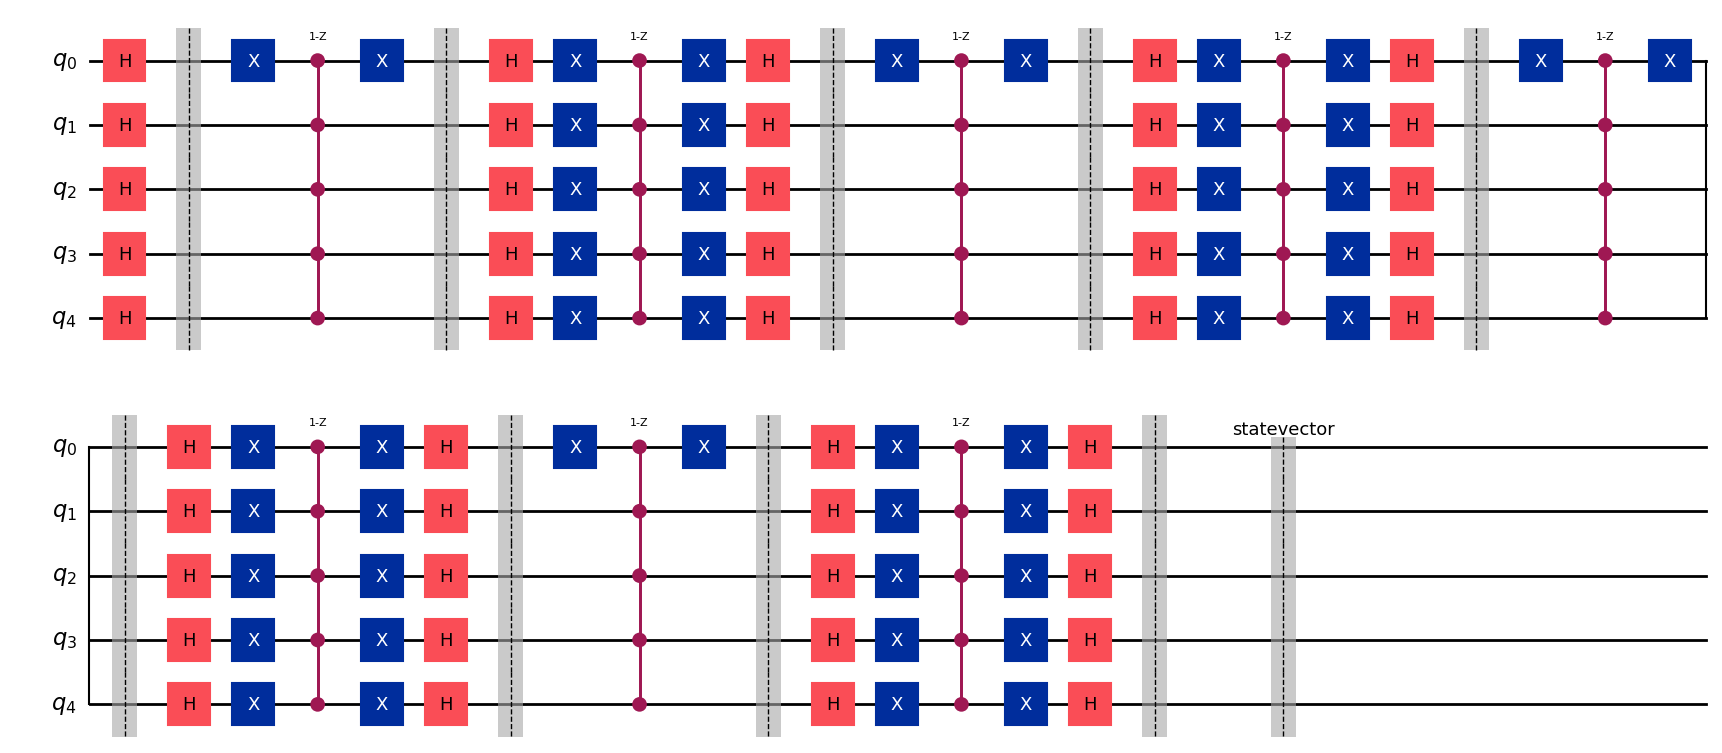

In [30]:
n = 5
s = [30]
qc= QuantumCircuit(n)
qc.h(range(n))
qc.barrier()

# Numero de iteraciones ideal = (\pi/4)√(𝑁/
niters = int((np.pi/4)*np.sqrt((1<<n)/len(s)))

print("Numero de iteraciones ideal = {}".format(niters))

for iter in range(niters):
    qc = qc.compose(grover(n,s))

qc.save_statevector()
qc.draw('mpl')

In [31]:
obten_estado(qc)

<IPython.core.display.Latex object>

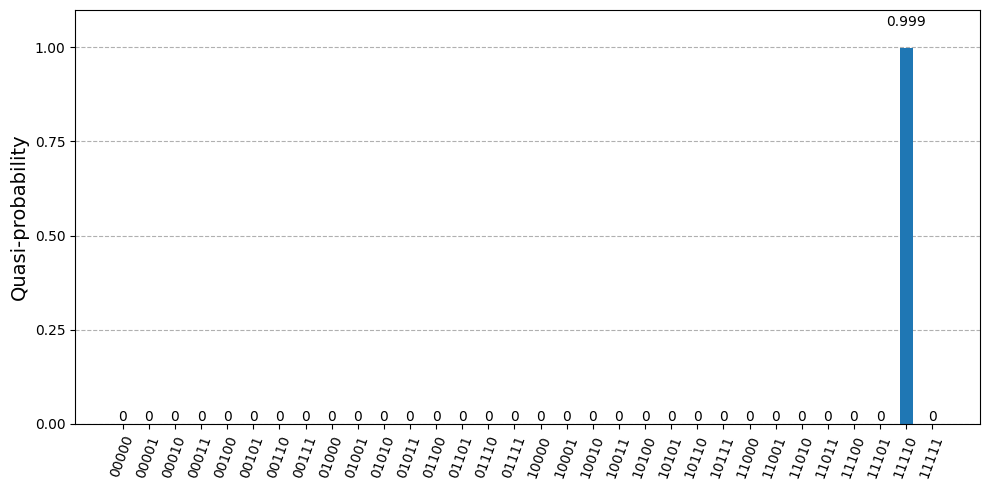

In [32]:
sim = AerSimulator()
qc_obj = transpile(qc, sim)
job_sim = sim.run(qc_obj, shots=100)
result = job_sim.result()
salida = result.get_counts()
plot_histogram(salida, figsize=(10,5))

# Interpretación geométrica del algoritmo de Grover<a name="geo"></a>

Sea $|s\rangle$ el estado inicial del algoritmo de Grover (superposición completa) y sea $w$ el valor para el que $f(w)=1$. Podemos escribir el estado inicial como:

$$
|s\rangle = \frac{1}{\sqrt{2^{n}}}{\sum_{x=0}^{2^n-1}|x\rangle} = \frac{\sum_{x\ne w}|x\rangle + |w\rangle}{\sqrt{2^{n}}} = \sqrt{\frac{2^n-1}{2^n}}\frac{1}{\sqrt{2^n-1}}\sum_{x\ne w}|x\rangle + \frac{1}{\sqrt{2^n}}|w\rangle
$$

Si denotamos:
$$
\begin{aligned}
|r\rangle &= \frac{1}{\sqrt{2^n-1}}\sum_{x\ne x_i}|x\rangle\\
N &= 2^n
\end{aligned}
$$

podemos escribir este estado como:

$$
|s\rangle = \frac{1}{\sqrt{N}}|w\rangle + \sqrt{\frac{N-1}{N}}|r\rangle
$$

Y como

$$
\left(\frac{1}{\sqrt{N}}\right)^2 + \left(\sqrt{\frac{N-1}{N}}\right)^2 = 1
$$

existe $\theta$ tal que podemos escribir el estado como:

$$
|s\rangle =\sin\theta|w\rangle + \cos\theta|r\rangle
$$

Podemos representar este estado así:

<!--img src="https://github.com/tarabelo/PIAC-apuntes/blob/main/images/GeoGrover1.png?raw=1" alt="Geo Grover 1" style="width: 200px;"/-->

<br>
<center><img src="https://drive.google.com/uc?export=view&id=1LTxkItpwErgsBT4-nRrwjON4AbQkgR4K" alt="Geo Grover 1" width="300"  /></center>
<br>


Si a este estado le aplicamos la inversión de fase, $U_f$, se le cambia el signo a $|w\rangle$:

$$
U_f|s\rangle = -\sin\theta|w\rangle + \cos\theta|r\rangle
$$

que equivale a una reflexión con respecto al eje $|r\rangle$:

<!--img src="https://github.com/tarabelo/PIAC-apuntes/blob/main/images/GeoGrover2.png?raw=1" alt="Geo Grover 2" style="width: 200px;"/-->

<br>
<center><img src="https://drive.google.com/uc?export=view&id=1fGJs667obKVpQ-fXI8ZZSJAPL3PqHn-R" alt="Geo Grover 2" width="300"  /></center>
<br>


Ahora aplicamos la amplificación de amplitud. El difusor $R_s = 2|s\rangle\langle s| -I$ mantiene el estado $|s\rangle$ pero invierte cualquier estado ortogonal a $|s\rangle$:

$$
\begin{aligned}
R_s|s\rangle &= 2|s\rangle\langle s|s\rangle - |s\rangle = 2|s\rangle - |s\rangle = |s\rangle\\
R_s|s^\perp\rangle &= 2|s\rangle\langle s|s^\perp\rangle - |s^\perp\rangle = -|s^\perp\rangle\\
\end{aligned}
$$

ya que $\langle s|s\rangle=1$ y $\langle s|s^\perp\rangle=0$. Es decir, $R_s$ produce una reflexión sobre $|s\rangle$.

Si aplicamos $R_s$ al estado $U_f|s\rangle$ tendremos el estado reflejado sobre $|s\rangle$:

<!--img src="https://github.com/tarabelo/PIAC-apuntes/blob/main/images/GeoGrover3.png?raw=1" alt="Geo Grover 3" style="width: 200px;"/-->

<br>
<center><img src="https://drive.google.com/uc?export=view&id=1nP_8pEpK2DNPMEF-5QFpaJJqrI0wscW3" alt="Geo Grover 3" width="300"  /></center>
<br>

Si aplicamos de nuevo las dos reflexiones $U_f$ y $R_s$ tendremos:

<!--img src="https://github.com/tarabelo/PIAC-apuntes/blob/main/images/GeoGrover4.png?raw=1" alt="Geo Grover 4" style="width: 200px;"/-->

<br>
<center><img src="https://drive.google.com/uc?export=view&id=1lvjeZmrnYT7eSPFr2YpuQLEKZTy_rKsI" alt="Geo Grover 4" width="300"  /></center>
<br>

Si continuamos aplicando las reflexiones, el estado se irá acercando a $|w\rangle$ que es la solución buscada.

**¿Cuándo se alcanza $|w\rangle$?**

Cada vez que aplicamos las reflexiones, el estado avanza un ángulo $2\theta$ con respecto a $|s\rangle$. Sea $t$ el número de reflexiones para llegar a $|w\rangle$:

$$
\begin{aligned}
\theta + 2\theta\cdot t = \frac{\pi}{2} \Rightarrow t = \frac{\pi}{4\theta} - \frac{1}{2}
\end{aligned}
$$

Como $\sin\theta = \frac{1}{\sqrt{N}}$, si $N$ es grande:

$$
\theta = \sin^{-1}\left(\frac{1}{\sqrt{N}}\right) \approx \frac{1}{\sqrt{N}}
$$

Por lo que:

$$
t \approx \frac{\pi}{4}\sqrt{N} - \frac{1}{2} \approx \left\lfloor\frac{\pi}{4}\sqrt{N}\right\rfloor
$$

Por lo que el número de repeticiones del algoritmo es $\mathcal{O}(\sqrt{2^n})$

Si hay $k$ elementos marcados, con $k\ll N$, el número óptimo de repeticiones es:

$$
\left\lfloor\frac{\pi}{4}\sqrt{\frac{N}{k}}\right\rfloor
$$